In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import yaml
import json
import numpy as np  
import utils.utils as utils
import re  

from utils.BeneficiaryProfile import Beneficiary

#### Identify cliffs 

* Find the benefits column(s)
* Plot Net Resources and Benefits 
* Find points of downward concavity 
* Compare vs the cliff points on the main plot  

In [3]:
## Load Beneficiary Profile 
p2_child1 = Beneficiary.from_yaml(os.path.join('projects', 'p2_child1.yaml'))
display(p2_child1.Profile)
display(p2_child1.get_family())
print(p2_child1.get_benefits())

{'ruleYear': [2023],
 'Year': [2023],
 'agePerson1': [30],
 'agePerson2': [30],
 'agePerson3': [8],
 'agePerson4': ['NA'],
 'agePerson5': ['NA'],
 'agePerson6': ['NA'],
 'agePerson7': ['NA'],
 'agePerson8': ['NA'],
 'agePerson9': ['NA'],
 'agePerson10': ['NA'],
 'agePerson11': ['NA'],
 'agePerson12': ['NA'],
 'disability1': [0],
 'disability2': [0],
 'disability3': [0],
 'disability4': [0],
 'disability5': [0],
 'disability6': [0],
 'disability7': [0],
 'disability8': [0],
 'disability9': [0],
 'disability10': [0],
 'disability11': [0],
 'disability12': [0],
 'blind1': [0],
 'blind2': [0],
 'blind3': [0],
 'blind4': [0],
 'blind5': [0],
 'blind6': [0],
 'ssdiPIA1': [0],
 'ssdiPIA2': [0],
 'ssdiPIA3': [0],
 'ssdiPIA4': [0],
 'ssdiPIA5': [0],
 'ssdiPIA6': [0],
 'married': [0],
 'prev_ssi': [0],
 'locations': ['New Castle County, DE'],
 'income_start': 27560,
 'income_end': 100000,
 'income_increase_by': 1000,
 'income.investment': [0],
 'income.gift': [0],
 'income.child_support': [0],
 

{'Adult1': {'Age': 30, 'Disability': False, 'Blind': False, 'SSDI_Monthly': 0},
 'Adult2': {'Age': 30, 'Disability': False, 'Blind': False, 'SSDI_Monthly': 0},
 'Child1': {'Age': 8, 'Disability': False}}

['CHILDCARE', 'HEADSTART', 'CCDF', 'REK', 'HEALTHCARE', 'MEDICAID_ADULT', 'MEDICAID_CHILD', 'CA', 'SECTION8', 'SNAP', 'SLP', 'WIC', 'EITC', 'TAXES', 'CTC', 'CDCTC', 'TANF', 'SSI', 'SSDI']


In [4]:
## Run script
p2_child1.run_applyBenefitsCalculator()


Attaching package: ‘shinydashboard’

The following object is masked from ‘package:graphics’:

    box


Attaching package: ‘shinyjs’

The following object is masked from ‘package:shiny’:

    runExample

The following objects are masked from ‘package:methods’:

    removeClass, show


Attaching package: ‘shinyWidgets’

The following object is masked from ‘package:shinyjs’:

    alert


Attaching package: ‘Hmisc’

The following objects are masked from ‘package:xtable’:

    label, label<-

The following object is masked from ‘package:shinyjs’:

    html

The following objects are masked from ‘package:base’:

    format.pval, units

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::count(



----------------------p2_child1----------------------



Warning messages:
1: Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(agePersonvar)

  # Now:
  data %>% select(all_of(agePersonvar))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>. 
2: Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(headstartPersonvar)

  # Now:
  data %>% select(all_of(headstartPersonvar))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>. 
3: Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(childcare.expvar)

  # Now:
  data %>% select(all_of(childcare.expvar))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>. 
There were 13 warnings (use warnings() to see them)


In [5]:
## Load Results DataFrame 
df = pd.read_csv(p2_child1.output_path)
df

,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,2546,509,3055,2000,835,0,0,23627,-5788.4
1,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,2386,477,2863,2000,827,0,0,24397,-5832.4
2,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,2226,445,2671,2000,816,0,0,25165,-5882.4
3,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,2066,413,2479,2000,825,0,0,25933,-5911.4
4,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,1907,381,2288,2000,852,0,0,26701,-5921.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,0,0,0,2000,900,0,0,72131,3767.6
69,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,0,0,0,2000,900,0,0,72768,4404.6
70,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,0,0,0,2000,900,0,0,73406,5042.6
71,2023,10,Delaware,DE,New Castle County,3,2,1,30,30,...,0,0,0,0,2000,900,0,0,74043,5679.6


In [9]:
## Find benefits column(s)
benefit_cols = [col for col in df.columns if 'value' in col]
df['value_sum'] = df[benefit_cols].sum(axis=1)
expense_cols = [col for col in df.columns if col[:3] == 'exp']
net_expense_cols = [col for col in df.columns if col[:6] == 'netexp']

df['netexp_sum'] = df[net_expense_cols].sum(axis=1)
df['exp_sum'] = df[expense_cols].sum(axis=1)

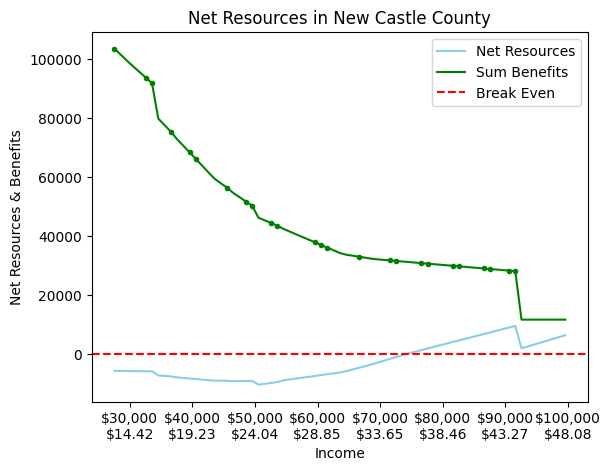

In [16]:
## Create figure, axis, and plot data 
fig, ax = plt.subplots()

concave_pct_threshold = 6

color_map = {

    'NetResources':'skyblue', 
    'value_sum':'g', 
    'netexp_sum':'b',
    'exp_sum':'y'

}

## plot net resources curve
y = df['NetResources']
x = df['income']
n_child = df['numkids'].iloc[0]
label_curve = 'Net Resources'

ax.plot(x,y, label=label_curve, color=color_map['NetResources'])

## plot benefits sums 
y = df['value_sum']
label_curve = 'Sum Benefits'
ax.plot(x,y, label=label_curve, color=color_map['value_sum'])

# Find points in benefits curve where the concavity becomes more negative 
second_derivative_benefits = np.gradient(np.gradient(y, x), x)


# ## plot net expenses 
# y = df['netexp_sum']
# label_curve = 'Net Expenses'
# ax.plot(x,y, label=label_curve, color=color_map['netexp_sum'])

# ## plot expenses sums 
# y = df['exp_sum']
# label_curve = f'Sum Expenses'
# ax.plot(x,y, label=label_curve, color=color_map['exp_sum'])

## Find points in benefits curve where the concavity becomes more negative 

second_derivative_benefits = np.gradient(np.gradient(y, x), x)
downward_concave = np.where(second_derivative_benefits < 0)[0]
concave_x = x[downward_concave]
concave_y = y[downward_concave]
plt.plot(concave_x, concave_y, '.', color=color_map['value_sum'])


## Create custom ticks for yearly and hourly wages 
# read from the current config file 
custom_ticks = list(range(30000, 100001, 10000)) 
def get_hourly_wage(x):
    # Assuming you work a 40 hour week, 52 weeks in a year 
    return f"${(x/52)/40:.2f}"
hourly_wages = [get_hourly_wage(x) for x in custom_ticks]

custom_labels = [f"${x[0]:,}\n{x[1]}" for x in zip(custom_ticks, hourly_wages)]

## Set custom ticks and labels for x axis 
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_labels)

## Set axis labels and title
ax.set_xlabel('Income')
ax.set_ylabel('Net Resources & Benefits')
ax.set_title('Net Resources in New Castle County')

## Add break even line 
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

## Add legend 
plt.legend()

---

In [66]:
import numpy as np 
from scipy.signal import argrelextrema 

# Find local minima of net resources
minima = argrelextrema(np.array(df['NetResources']), np.less)
df_minima = df[['income', 'NetResources']].iloc[minima]

# Get the previous income level for cliffs
cliffs = df[['income', 'NetResources']].iloc[[x-1 for x in minima[0]]]
cliffs 

# Add a marker at the previous 


,income,NetResources
25,52560,-3440.6
27,54560,-3533.6
32,59560,-6247.7


In [61]:
minima

(array([26, 28, 33]),)

In [59]:
[x-1 for x in minima]

[array([25, 27, 32])]

- [x] Run the r script for each of the project yamls

Read each of the project outputs

,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,22895,-1163
1,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,23645,-845
2,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,24393,-810
3,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,25141,-505
4,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,25889,-204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,69339,35802
69,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,69976,36439
70,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,70614,37077
71,2023,10,Delaware,DE,New Castle County,1,1,0,30,NaN,...,0,0,0,0,0,0,0,0,71251,37714


,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,2546,509,3055,2000,835,0,0,23627,115.6
1,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,2386,477,2863,2000,827,0,0,24397,-37.4
2,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,2226,445,2671,2000,816,0,0,25165,-201.4
3,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,2066,413,2479,2000,825,0,0,25933,-529.4
4,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,1907,381,2288,2000,852,0,0,26701,-663.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72131,22878.6
69,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72768,23515.6
70,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,73406,24153.6
71,2023,10,Delaware,DE,New Castle County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,74043,24790.6


,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,4599,920,5519,4000,835,0,0,23627,2952.4
1,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,4389,878,5267,4000,827,0,0,24397,2848.4
2,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,4178,836,5014,4000,816,0,0,25165,2737.4
3,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,3967,793,4760,4000,825,0,0,25933,2646.4
4,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,3757,751,4508,4000,852,0,0,26701,2575.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,0,0,0,4000,1800,0,0,72131,4275.2
69,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,0,0,0,4000,1800,0,0,72768,4912.2
70,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,0,0,0,4000,1800,0,0,73406,5550.2
71,2023,10,Delaware,DE,New Castle County,3,1,2,30,8,...,0,0,0,0,4000,1800,0,0,74043,6187.2


,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,5370,1009,6379,6000,371,0,0,23627,1916.40
1,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,5159,1032,6191,6000,367,0,0,24397,1894.40
2,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,4949,990,5939,6000,816,0,0,25165,1781.40
3,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,4738,948,5686,6000,825,0,0,25933,1690.40
4,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,4528,906,5434,6000,852,0,0,26701,1617.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,0,0,0,6000,1800,0,0,72131,5060.34
69,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,0,0,0,6000,1800,0,0,72768,5606.34
70,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,0,0,0,6000,1800,0,0,73406,6153.34
71,2023,10,Delaware,DE,New Castle County,4,1,3,30,8,...,0,0,0,0,6000,1800,0,0,74043,6698.34


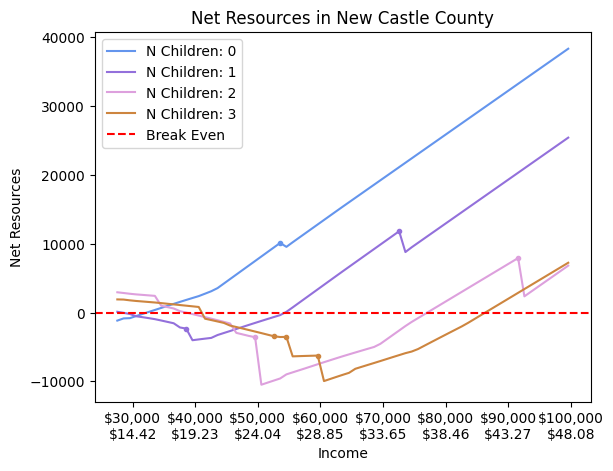

In [139]:
## Create figure, axis, and plot data 
fig, ax = plt.subplots()

colors = [
    'cornflowerblue', 
    'mediumpurple', 
    'plum', 
    'peru'
]

concave_pct_threshold = 6

for proj,color in zip(('p1_child0', 'p1_child1', 'p1_child2', 'p1_child3'), colors):
    df = utils.read_output(proj)
    df.T.dropna()
    display(df)

    ## plot curve
    y = df['NetResources']
    x = df['income']
    n_child = proj[-1]
    label_curve = f'N Children: {n_child}'

    ax.plot(x,y, label=label_curve, color=color)

    # Find local minima of net resources
    minima_idx = argrelextrema(np.array(y), np.less)
    cliff_idx = [idx-1 for idx in minima_idx[0]]

    # Get the previous income level for the cliffs
    cliff_x = x.iloc[cliff_idx]
    cliff_y = y.iloc[cliff_idx]

    # Plot markers
    plt.plot(cliff_x, cliff_y, '.', color=color)

    # second derivative 
    second_derivative = np.gradient(np.gradient(y, x), x)

    # Encontramos los índices donde la segunda derivada es negativa
    threshold = np.percentile(second_derivative, concave_pct_threshold)
    downward_concave = np.where(second_derivative < threshold)[0]

    concave_x = x[downward_concave]
    concave_y = y[downward_concave]
    # plt.plot(concave_x, concave_y, 'd', color=color)

    # in both
    both_x = np.intersect1d(cliff_x, concave_x)
    both_y = np.intersect1d(cliff_y, concave_y)
  
    # plt.plot(both_x, both_y, '.', color=color)
    # plt.plot(cliff_x, cliff_y, '.', color=color)

## Create custom ticks for yearly and hourly wages 
# read from the current config file 
custom_ticks = list(range(30000, 100001, 10000)) 
def get_hourly_wage(x):
    # Assuming you work a 40 hour week, 52 weeks in a year 
    return f"${(x/52)/40:.2f}"
hourly_wages = [get_hourly_wage(x) for x in custom_ticks]

custom_labels = [f"${x[0]:,}\n{x[1]}" for x in zip(custom_ticks, hourly_wages)]

## Set custom ticks and labels for x axis 
ax.set_xticks(custom_ticks)
ax.set_xticklabels(custom_labels)

## Set axis labels and title
ax.set_xlabel('Income')
ax.set_ylabel('Net Resources')
ax.set_title('Net Resources in New Castle County')

## Create custom ticks for yearly and hourly wages 
# read from the current config file 
custom_ticks = list(range(30000, 100001, 10000)) 
def get_hourly_wage(x):
    # Assuming you work a 40 hour week, 52 weeks in a year 
    return f"${(x/52)/40:.2f}"
hourly_wages = [get_hourly_wage(x) for x in custom_ticks]

custom_labels = [f"${x[0]:,}\n{x[1]}" for x in zip(custom_ticks, hourly_wages)]


## Add break even line 
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

## Add legend 
plt.legend()

In [130]:
y

0     1916.40
1     1894.40
2     1781.40
3     1690.40
4     1617.40
       ...   
68    5060.34
69    5606.34
70    6153.34
71    6698.34
72    7245.34
Name: NetResources, Length: 73, dtype: float64

In [83]:
np.percentile(second_derivative, 40)

-6.000000000000002e-07

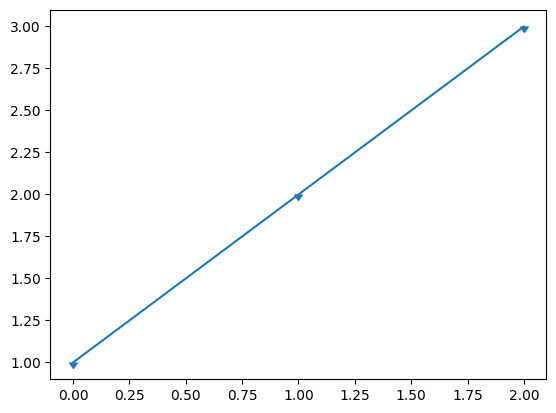

In [68]:
plt.plot([1, 2, 3], marker=11)
# plt.plot([1, 2, 3], marker=matplotlib.markers.CARETDOWNBASE)


In [26]:
### Ideas for identifying and plotting markers on the cliff thresholds

## Find income levels (x values) where the total benefits at the next income level are lower than the total benefits at the current income level 

## Calculate second derivative of each curve (less precise, could include x values where increased expenses are driving the downward turn)

#### 0B: National Average 

In [6]:
changes_dict = {'income_start':27560, 
 'income_end':100000,
 'income_increase_by':1000, 
 'locations':['all']}

project_name = 'national_avg'

nat_avg_config = utils.create_ben_profile_dict(**changes_dict) 
utils.save_config(nat_avg_config, project_name=project_name)

df_nat_avg = utils.read_output(project_name)

display(df_nat_avg)

df_nat_avg.T.dropna()

Saved to projects/national_avg.yaml
Project name: national_avg


,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2546,0,2546,2000,385,0,0,23448.0,-5028.0
1,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2386,0,2386,2000,368,0,0,24221.0,-4840.0
2,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2226,0,2226,2000,383,0,0,24995.0,-4733.0
3,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2066,0,2066,2000,374,0,0,25768.0,-4546.0
4,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,1907,0,1907,2000,406,0,0,26542.0,-4432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341489,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,77251.0,31490.6
341490,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,77954.0,32193.6
341491,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,78658.0,32897.6
341492,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,79361.0,33600.6


,0,1,2,3,4,5,6,7,8,9,...,341484,341485,341486,341487,341488,341489,341490,341491,341492,341493
ruleYear,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023,...,2023,2023,2023,2023,2023,2023,2023,2023,2023,2023
stateFIPS,1,1,1,1,1,1,1,1,1,1,...,56,56,56,56,56,56,56,56,56,56
stateName,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,Alabama,...,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
stateAbbrev,AL,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
countyortownName,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,Autauga County,...,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County,Weston County
famsize,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
numadults,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
numkids,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
agePerson1,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
agePerson2,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [7]:
def calculate_sem(group):
    return group.sem()

,income,mean,median,95%_mean_CI_dist,95%_mean_CI_lower,95%_mean_CI_upper
0,27560,1720.53,2036.0,73.21,1647.32,1793.74
1,28560,1732.81,2047.0,72.03,1660.78,1804.84
2,29560,1765.22,2105.0,71.15,1694.07,1836.37
3,30560,1722.21,2086.0,70.53,1651.68,1792.74
4,31560,1741.42,2135.6,70.48,1670.94,1811.90
...,...,...,...,...,...,...
68,95560,32277.86,33709.6,184.32,32093.54,32462.18
69,96560,32933.70,34372.6,184.87,32748.83,33118.57
70,97560,33591.37,35011.0,185.40,33405.97,33776.77
71,98560,34249.12,35642.0,185.82,34063.30,34434.94


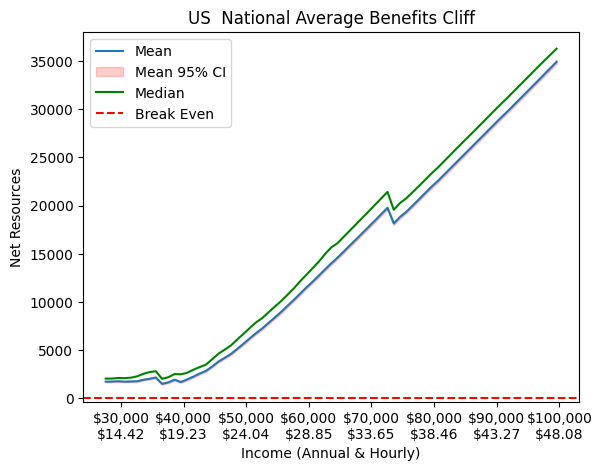

In [8]:
## National net resources by income level
# Mean, median, CI 
data = df_nat_avg.groupby(['income'])['NetResources'].agg(['mean','median']).round(2)
sem = df_nat_avg.groupby(['income'])['NetResources'].apply(calculate_sem)
ci = sem.mul(1.96)\
    .round(2)\
    .reset_index()\
    .rename({'NetResources':'95%_mean_CI_dist'}, axis=1)

data = data.merge(ci, how='left', on='income')

data['95%_mean_CI_lower'] = data['mean'] - data['95%_mean_CI_dist']
data['95%_mean_CI_upper'] = data['mean'] + data['95%_mean_CI_dist']
# data['95%_mean_CI'] = data[['mean','95%_mean_CI_dist']].apply(lambda row: tuple((np.round(row['mean']-row['95%_mean_CI_dist'],2), np.round(row['mean']+row['95%_mean_CI_dist'],2))), axis=1)

display(data)

# Plot
# plt.figure(figsize=(8, 6))
fig, ax = plt.subplots()

= 
# Plot mean
plt.plot(data['income'], data['mean'], linestyle='-', label='Mean')
plt.fill_between(data['income'], (data['95%_mean_CI_lower']).values, (data['95%_mean_CI_upper']).values, color='r', alpha=0.2, label='Mean 95% CI')

# Plot median
plt.plot(data['income'], data['median'], linestyle='-', label='Median', color='g')


## Add break even line 
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

## Add legend 
plt.legend

## Add custom ticks and labels 
ticks, labels = utils.create_custom_ticks_labels()
ax.set_xticks(ticks)
ax.set_xticklabels(labels)


## Set axis labels and title
ax.set_xlabel('Income (Annual & Hourly)')
ax.set_ylabel('Net Resources')
ax.set_title('US  National Average Benefits Cliff')

## Legend 
plt.legend()

plt.show()

In [9]:
x = df_nat_avg.groupby(['stateName', 'countyortownName'])['income'].unique().reset_index()

# x['income'].apply(lambda y: len(y))

# 1.) Look at 20% 

In [10]:
df_nat_avg[['stateName','countyortownName']].drop_duplicates()

,stateName,countyortownName
0,Alabama,Autauga County
73,Alabama,Baldwin County
146,Alabama,Barbour County
219,Alabama,Bibb County
292,Alabama,Blount County
...,...,...
341129,Wyoming,Sweetwater County
341202,Wyoming,Teton County
341275,Wyoming,Uinta County
341348,Wyoming,Washakie County


In [11]:
## Use (county) population for a weighted (?) mean?   

In [12]:
data

,income,mean,median,95%_mean_CI_dist,95%_mean_CI_lower,95%_mean_CI_upper
0,27560,1720.53,2036.0,73.21,1647.32,1793.74
1,28560,1732.81,2047.0,72.03,1660.78,1804.84
2,29560,1765.22,2105.0,71.15,1694.07,1836.37
3,30560,1722.21,2086.0,70.53,1651.68,1792.74
4,31560,1741.42,2135.6,70.48,1670.94,1811.90
...,...,...,...,...,...,...
68,95560,32277.86,33709.6,184.32,32093.54,32462.18
69,96560,32933.70,34372.6,184.87,32748.83,33118.57
70,97560,33591.37,35011.0,185.40,33405.97,33776.77
71,98560,34249.12,35642.0,185.82,34063.30,34434.94


In [13]:
data

,income,mean,median,95%_mean_CI_dist,95%_mean_CI_lower,95%_mean_CI_upper
0,27560,1720.53,2036.0,73.21,1647.32,1793.74
1,28560,1732.81,2047.0,72.03,1660.78,1804.84
2,29560,1765.22,2105.0,71.15,1694.07,1836.37
3,30560,1722.21,2086.0,70.53,1651.68,1792.74
4,31560,1741.42,2135.6,70.48,1670.94,1811.90
...,...,...,...,...,...,...
68,95560,32277.86,33709.6,184.32,32093.54,32462.18
69,96560,32933.70,34372.6,184.87,32748.83,33118.57
70,97560,33591.37,35011.0,185.40,33405.97,33776.77
71,98560,34249.12,35642.0,185.82,34063.30,34434.94


Net Resources (mean, per income bracket)


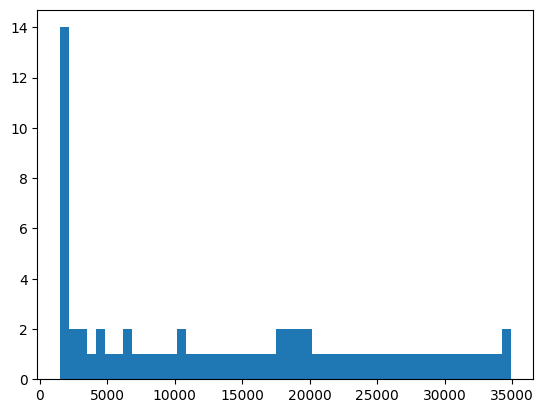

In [14]:
plt.hist(data['mean'], bins=50)
print('Net Resources (mean, per income bracket)')

## among all income brackets, the most common net resource level is around 0 
## is this geographically determined? around places where population is low? 

In [15]:
# 1.) Look at lower 20% of net resources ^^ -- maybe in a state? rural? smaller population areas  

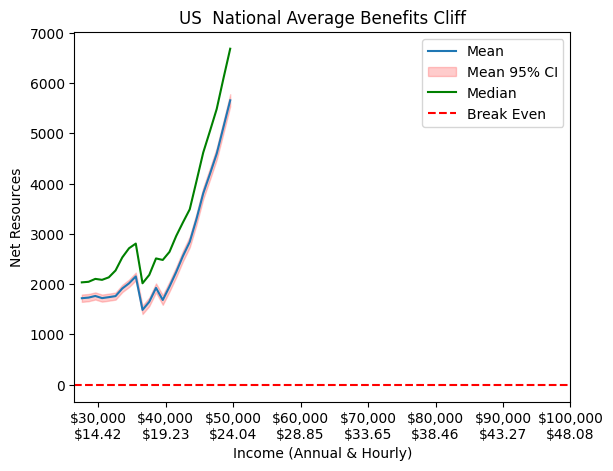

In [16]:
data_zoomed = data[data['income'] < 50000]
data_zoomed
x = data_zoomed.index
y = data_zoomed.values 

fig, ax = plt.subplots()

# Plot mean
plt.plot(data_zoomed['income'], data_zoomed['mean'], linestyle='-', label='Mean')
plt.fill_between(data_zoomed['income'], (data_zoomed['95%_mean_CI_lower']).values, (data_zoomed['95%_mean_CI_upper']).values, color='r', alpha=0.2, label='Mean 95% CI')

# Plot median
plt.plot(data_zoomed['income'], data_zoomed['median'], linestyle='-', label='Median', color='g')


## Add break even line 
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

## Add legend 
plt.legend

## Add custom ticks and labels 
ticks, labels = utils.create_custom_ticks_labels()
ax.set_xticks(ticks)
ax.set_xticklabels(labels)

## Set axis labels and title
ax.set_xlabel('Income (Annual & Hourly)')
ax.set_ylabel('Net Resources')
ax.set_title('US  National Average Benefits Cliff')


## Legend 
plt.legend()

plt.show()

### All Delaware Counties 

In [17]:
df_nat_avg

,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
0,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2546,0,2546,2000,385,0,0,23448.0,-5028.0
1,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2386,0,2386,2000,368,0,0,24221.0,-4840.0
2,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2226,0,2226,2000,383,0,0,24995.0,-4733.0
3,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,2066,0,2066,2000,374,0,0,25768.0,-4546.0
4,2023,1,Alabama,AL,Autauga County,2,1,1,30,8,...,0,1907,0,1907,2000,406,0,0,26542.0,-4432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341489,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,77251.0,31490.6
341490,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,77954.0,32193.6
341491,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,78658.0,32897.6
341492,2023,56,Wyoming,WY,Weston County,2,1,1,30,8,...,0,0,0,0,2000,600,0,0,79361.0,33600.6


Kent County
New Castle County
Sussex County


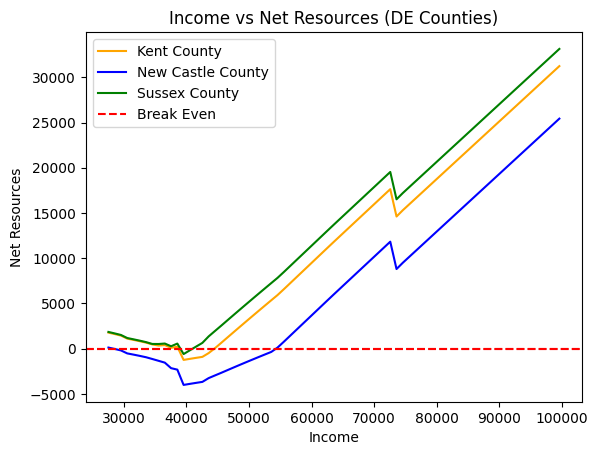

,ruleYear,stateFIPS,stateName,stateAbbrev,countyortownName,famsize,numadults,numkids,agePerson1,agePerson2,...,value.ctc.state,value.eitc.fed,value.eitc.state,value.eitc,value.ctc,value.cdctc,value.ssdi,value.ssi,AfterTaxIncome,NetResources
34967,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2546,509,3055,2000,835,0,0,23627.0,1766.6
34968,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2386,477,2863,2000,827,0,0,24397.0,1607.6
34969,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2226,445,2671,2000,816,0,0,25165.0,1437.6
34970,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,2066,413,2479,2000,825,0,0,25933.0,1104.6
34971,2023,10,Delaware,DE,Kent County,2,1,1,30,8,...,0,1907,381,2288,2000,852,0,0,26701.0,964.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35181,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72131.0,30587.6
35182,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,72768.0,31224.6
35183,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,73406.0,31862.6
35184,2023,10,Delaware,DE,Sussex County,2,1,1,30,8,...,0,0,0,0,2000,900,0,0,74043.0,32499.6


In [124]:
loc_test = df_nat_avg[df_nat_avg['countyortownName'].isin(['New Castle County', 'Kent County', 'Sussex County']) & (df_nat_avg['stateName'] == 'Delaware')]
loc_test

grouped_data = loc_test.groupby(['countyortownName','income'])['NetResources'].mean().round(2).reset_index(['income']) 
# not actually taking the mean, there's only one value per county and income bracket

grouped_data

color_map = {
    'New Castle County': 'blue',
    'Kent County': 'orange',
    'Sussex County': 'green'
}


# Create figure and subplots

for label in grouped_data.index.unique():
    print(label)
    data = grouped_data[grouped_data.index == label]
    plt.plot(data['income'], data['NetResources'], label=label, color=color_map[label])
    # plt.scatter(data['income'], data['NetResources'])
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')


plt.xlabel('Income')
plt.ylabel('Net Resources')
plt.title('Income vs Net Resources (DE Counties)')
plt.legend()

# plt.grid(True)

plt.axhline(y=0, color='r', linestyle='--', label='Break Even')

plt.show()

display(loc_test)

In [19]:
df_de_summary = pd.pivot(grouped_data.reset_index().rename({'income':'annual_income'}, axis=1), index='countyortownName', columns='annual_income', values='NetResources')
df_de_summary.iloc[:,list(range(0,len(df_de_summary.columns),10))]

annual_income,27560,37560,47560,57560,67560,77560,87560,97560
countyortownName,,,,,,,,
Kent County,1766.6,87.0,1827.6,7877.6,14400.6,17211.6,23586.6,29961.6
New Castle County,115.6,-2161.0,-2083.4,2069.6,8592.6,11403.6,17778.6,24153.6
Sussex County,1843.6,260.0,3728.6,9778.6,16301.6,19112.6,25487.6,31862.6


---

### "The Initial Story"
- 1.) Choose a persona (single parent @ 30, one 8 year-old child, select benefits)
- 2.) 3 counties (see above plot)
- 3.) Pick a county -- show a couple jobs for that county (as income progressions)

We don't yet have access to the county-localized jobs data with income growth projections.

OEWS looks like it gives state/metro area level income distributions (quintiles). 
* https://www.bls.gov/oes/tables.htm -- to verify it's not just on the mynextmove site

The CLIFF dashboard indicates that it uses the formulas from [this pdf](https://npowerpa.sharepoint.com/sites/DataInnovationLab/Shared%20Documents/Forms/AllItems.aspx?ga=1&id=%2Fsites%2FDataInnovationLab%2FShared%20Documents%2FProjects%2Fproj%5Fbenefits%5Fcliffs%2FShared%20from%20FRB%2FPDFs%2FBLS%5FEstimating%5FOccupation%5Fand%5FLocation%5FSpecific%5FWages%5Fover%5Fthe%5FLife%5FCycle%2Epdf&viewid=67435686%2Dec6f%2D4f99%2Db230%2Dcba53f299cb1&parent=%2Fsites%2FDataInnovationLab%2FShared%20Documents%2FProjects%2Fproj%5Fbenefits%5Fcliffs%2FShared%20from%20FRB%2FPDFs) to: 

- 1.) Localize to county level

- 2.) Project future income growth curve

All I have from the OEWS website are the income quintiles for Delaware.

* https://www.mynextmove.org/profile/wages/15-1299.05?zip=19711 - info sec engineer
* https://www.mynextmove.org/profile/wages/29-1292.00?zip=19711 - dental hygienist 
* https://www.mynextmove.org/profile/wages/15-1254.00?zip=19711 - web developer 
* https://www.mynextmove.org/profile/wages/29-1171.00?st=DE - nurse practitioner
* https://www.mynextmove.org/profile/wages/29-1141.00?zip=19711 - registered nurse 
* https://www.mynextmove.org/profile/wages/35-2011.00?zip=19711 - cooks, fast food 
* https://www.mynextmove.org/profile/wages/41-2031.00?zip=19711 - retail sales``
* https://www.mynextmove.org/profile/wages/49-9031.00?zip=19711 - Home appliance repair
* https://www.mynextmove.org/profile/wages/51-9081.00?zip=19711 - dental lab tech


#### Scraping OEWS income quintiles for Delaware 
 

In [121]:
base_url = "https://www.mynextmove.org/profile/"
# wages/15-1299.05?zip=19711 - info sec engineer
# wages/29-1292.00?zip=19711 - dental hygienist 
# wages/15-1254.00?zip=19711 - web developer 
# wages/29-1171.00?st=DE - nurse practitioner
# wages/29-1141.00?zip=19711 - registered nurse 


job_dict = {
    '1299.05':'InfoSec Engineer',
    '1292.00':'Dental Hygienist', 
    '1254.00':'Web Developer',
    '1171.00':'Nurse Practitioner', 
    '1141.00':'Registered Nurse', 
    '2011.00':'Fast Food Cook',
    '2031.00':'Retail Sales',
    '9031.00':'Home Appliance Repair',
    '9081.00':'Dental Lab Tech',
       
}

job_data_fps = [os.path.join('example_jobs',f) for f in os.listdir('example_jobs')]
dataframes = []
for fp in job_data_fps: 
    if 'csv' in fp: 
        df = pd.read_csv(fp)
        job_code = re.search('[0-9]+\.[0-9]+',fp).group(0)
        job_title = job_dict[job_code]
        df['Job Title'] = job_title
        # print(job_title, fp)
        dataframes.append(df)

df = pd.concat(dataframes)
cols = df.filter(regex='Annual|Hourly').columns
de_jobs_df = df[df['Location'] == 'Delaware'].drop(['Location'], axis=1).set_index('Job Title')
de_jobs_df = de_jobs_df.apply(lambda row: pd.Series([float(re.sub('\$|,','',x)) for x in row.values]) , axis=1)
de_jobs_df.columns = cols

de_jobs_df = de_jobs_df.sort_values('Annual Median (50%)', ascending=False)

de_jobs_df

,Annual Low (10%),Annual QL (25%),Annual Median (50%),Annual QU (75%),Annual High (90%),Hourly Low (10%),Hourly QL (25%),Hourly Median (50%),Hourly QU (75%),Hourly High (90%)
Job Title,,,,,,,,,,
Nurse Practitioner,99160.0,104360.0,122530.0,133060.0,156040.0,47.68,50.17,58.91,63.97,75.02
InfoSec Engineer,62500.0,87340.0,114340.0,142590.0,170060.0,30.05,41.99,54.97,68.55,81.76
Web Developer,73110.0,86900.0,97240.0,107150.0,140860.0,35.15,41.78,46.75,51.51,67.72
Dental Hygienist,77690.0,81350.0,84070.0,97620.0,103400.0,37.35,39.11,40.42,46.93,49.71
Registered Nurse,64100.0,78370.0,82230.0,97990.0,101110.0,30.82,37.68,39.54,47.11,48.61
Home Appliance Repair,24430.0,27810.0,37090.0,63270.0,78360.0,11.75,13.37,17.83,30.42,37.67
Retail Sales,22830.0,24460.0,28490.0,34670.0,43390.0,10.97,11.76,13.70,16.67,20.86
Fast Food Cook,21930.0,23750.0,26140.0,29550.0,34150.0,10.54,11.42,12.57,14.21,16.42


#### Plotting the quintiles as income increases

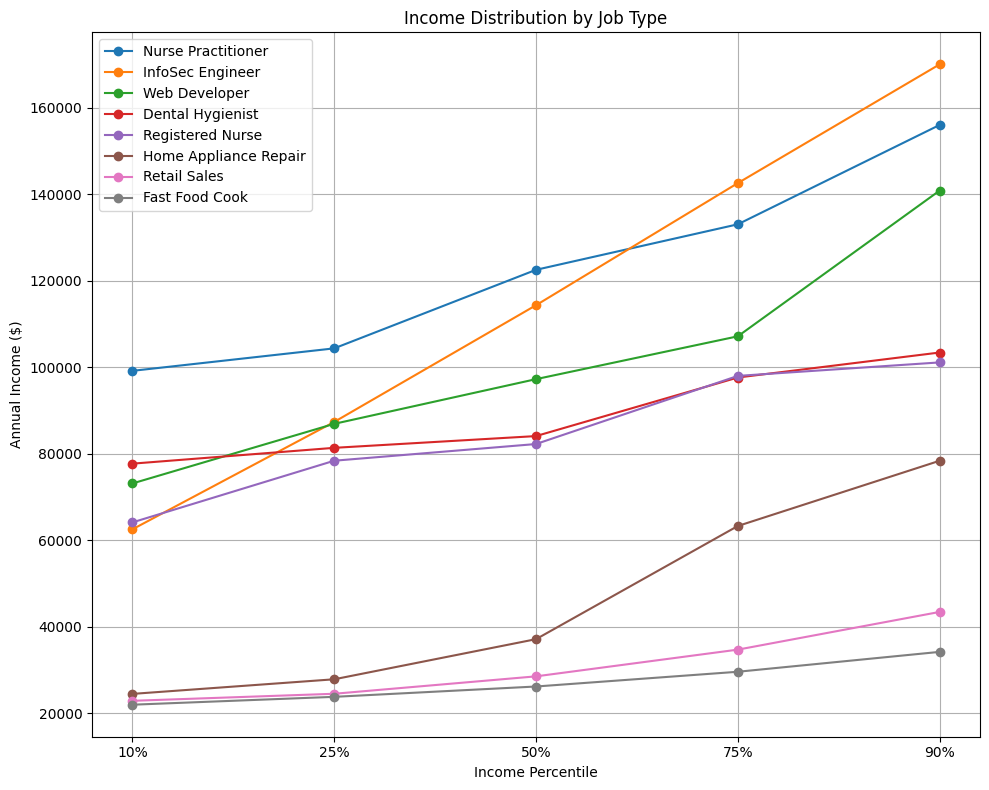

In [125]:
# import matplotlib.pyplot as plt

# job_data = de_jobs_df.iloc[:,:5]

# percentiles = ['10%', '25%', '50%', '75%', '90%']

# plt.figure(figsize=(10, 8))

# for job, incomes in job_data.iterrows():
#     plt.plot(percentiles, incomes.values, label=job, marker='o')

# plt.title('Income Distribution by Job Type')
# plt.xlabel('Income Percentile')
# plt.ylabel('Annual Income ($)')
# plt.xticks(percentiles)
# plt.grid(True)
# plt.legend()
# plt.tight_layout()

# plt.show()


#### Interpolating the quintiles to fit the Net Resources curve

This is equivalent to running the functions from the R repo to calculate Net Resources for a specific income, but faster and as an estimate (to per-$1k level income increase)

#### Again, Caution: The income figures from OEWS are State-Level, NOT Localized to New Castle County  

We don't have localized

In [131]:
data = df_nat_avg[(df_nat_avg['countyortownName'] == 'New Castle County') & (df_nat_avg['stateName'] == 'Delaware')][['income','NetResources']].reset_index(drop=True).rename({"NetResources":"net_resources"}, axis=1)
display(data)

,income,net_resources
0,27560,115.6
1,28560,-37.4
2,29560,-201.4
3,30560,-529.4
4,31560,-663.4
...,...,...
68,95560,22878.6
69,96560,23515.6
70,97560,24153.6
71,98560,24790.6


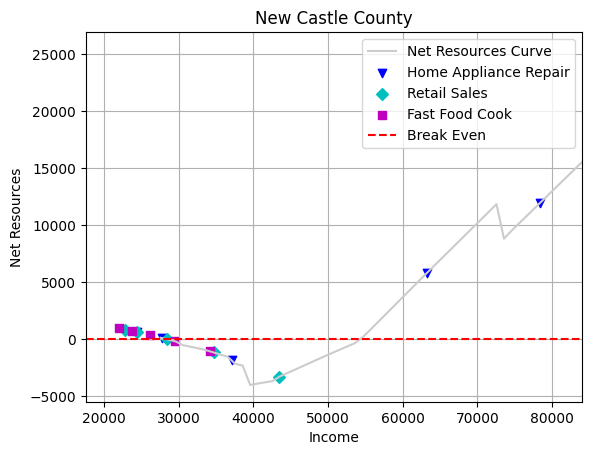

In [133]:
## Plot the Net Resources Curve 
df = data
plt.plot(df['income'], df['net_resources'], linestyle='-', color='0.8', label='Net Resources Curve')

## Interpolate and plot the income levels from the different jobs 
job_plot_dict = {

#  'Web Developer':'r', 
#  'Dental Hygienist':{'color':'r', 'marker':'P'}, 
 'Home Appliance Repair':{'color':'b', 'marker':'v'}, 
 'Retail Sales':{'color':'c', 'marker':'D'}, 
 'Fast Food Cook':{'color':'m', 'marker':'s'}

}

for job_title in job_plot_dict.keys():

    # Set the aesthetic qualities from the dict
    color = job_plot_dict[job_title]['color']
    marker = job_plot_dict[job_title]['marker']


    # Locate income values from dataframe
    incomes_to_interpolate = de_jobs_df.loc[job_title].iloc[:5].values

    # Find the indices of the two closest income values for each income to interpolate
    idxs = np.searchsorted(df['income'], incomes_to_interpolate)
    idxs = np.clip(idxs, 1, len(df)-1)
    left_indices = idxs - 1
    right_indices = idxs

    # Get the nearest income values and net resources for each income to interpolate
    nearest_incomes_left = df.loc[left_indices, 'income'].values
    nearest_incomes_right = df.loc[right_indices, 'income'].values
    nearest_net_resources_left = df.loc[left_indices, 'net_resources'].values
    nearest_net_resources_right = df.loc[right_indices, 'net_resources'].values

    # Interpolate for each income
    interpolated_net_resources = (nearest_net_resources_left + 
                                (nearest_net_resources_right - nearest_net_resources_left) * 
                                ((incomes_to_interpolate - nearest_incomes_left) / 
                                (nearest_incomes_right - nearest_incomes_left)))

    # Plot the data
    plt.scatter(incomes_to_interpolate, interpolated_net_resources, color=color, marker=marker, label=job_title)

plt.xlabel('Income')
plt.ylabel('Net Resources')
plt.title('New Castle County')
plt.axhline(y=0, color='r', linestyle='--', label='Break Even')
plt.legend()
plt.grid(True)
# plt.figure(figsize=(400,6))
plt.xlim(df['income'].min() - 10000 , 84000)  # Adjust the limits according to your requirement
plt.show()
